# Classification

# 1.Import Library

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# 2. Loading and Review Data

In [312]:
data = pd.read_csv('dataset\\bank-additional\\bank-additional\\bank-additional.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [313]:
data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [314]:
data.shape

(4119, 21)

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [316]:
data.isnull().sum().any()

False

Sebelum melakukan pemodelan pada dataset, dipastikan terlebih dahulu bahwa dataset yang digunakan bersih (tidak ada nilai null). Berdasarkan sintaks diatas, dataset yang diperoleh sudah bersih dan siap untuk diolah.

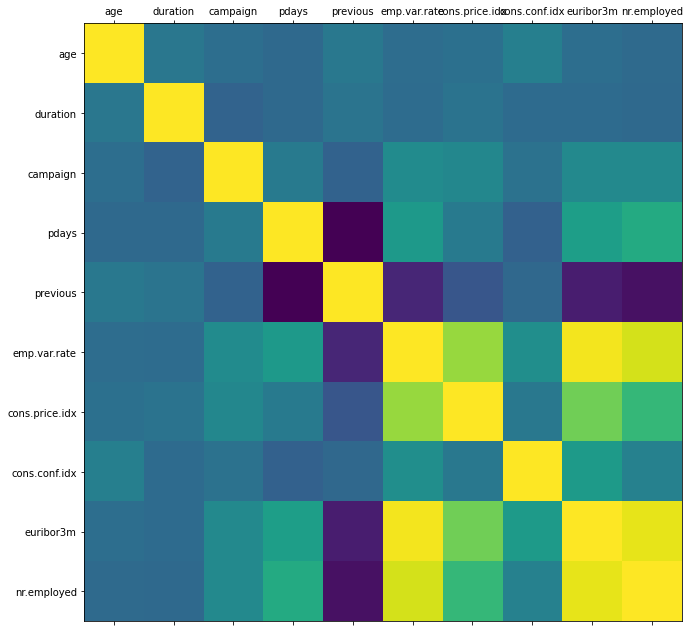

In [317]:
# proses pemilihan atribut yang sekiranya penting
# dan menghapus atribut yang tidak memiliki korelasi sama sekali

def plot_corr(data, size=11):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(data)

In [318]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


Berdasarkan proses diatas, tidak ada atribut yang dipertimbangkan untuk dihapus dikarenakan tidak terdapat redundant pada masing-masing atribut. Setiap atribut memiliki nilai korelasi yang berbeda. 

In [319]:
# Agar tipe data seragam, maka data yang bersifat categoric
# akan diubah menjadi bentuk numeric

# 1. atribut class
class_map = {'yes': 1, 'no': 0}
data['y'] = data['y'].map(class_map)

In [320]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [321]:
# 2. atribut job
job_map = {'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4,
           'management':5, 'retired':6, 'self-employed':7, 'services':8, 
           'student':9, 'technician':10, 'unemployed':11, 'unknown':12}
data['job'] = data['job'].map(job_map)

# 3. atribut marital
marital_map = {'single':1, 'married':2, 'divorced':3, 'unknown':4}
data['marital'] = data['marital'].map(marital_map)

# 4. atribut education
edu_map = {'basic.9y':1, 'high.school':2, 'university.degree':3, 'professional.course':4,
           'basic.6y':5, 'basic.4y':6, 'unknown':7, 'illiterate':8}
data['education'] = data['education'].map(edu_map)

# 5. atribut default
default_map = {'no':0, 'yes':1, 'unknown':2}
data['default'] = data['default'].map(default_map)

# 6. atribut housing
housing_map = {'no':0, 'yes':1, 'unknown':2}
data['housing'] = data['housing'].map(housing_map)

# 7. atribut loan
loan_map = {'no':0, 'yes':1, 'unknown':2}
data['loan'] = data['loan'].map(loan_map)

# 8. atribut contact
contact_map = {'cellular':0, 'telephone':1}
data['contact'] = data['contact'].map(contact_map)

# 9. atribut month
month_map = {'mar':3, 'apr':4,  'may':5, 'jun':6, 'jul':7, 'aug':8, 
           'sep':9, 'oct':10, 'nov':11, 'dec':12}
data['month'] = data['month'].map(month_map)

# 10. atribut day_of_week
dow_map = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
data['day_of_week'] = data['day_of_week'].map(dow_map)

# 11. atribut poutcome
po_map = {'failure':0, 'success':2, 'nonexistent':3}
data['poutcome'] = data['poutcome'].map(po_map)

In [322]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,2,1,0,1,0,0,5,5,...,2,999,0,3,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,8,1,2,0,0,0,1,5,5,...,4,999,0,3,1.1,93.994,-36.4,4.855,5191.0,0
2,25,8,2,2,0,1,0,1,6,3,...,1,999,0,3,1.4,94.465,-41.8,4.962,5228.1,0
3,38,8,2,1,0,2,2,1,6,5,...,3,999,0,3,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,2,3,0,1,0,0,11,1,...,1,999,0,3,-0.1,93.200,-42.0,4.191,5195.8,0


In [323]:
data.isnull().sum().sum()

0

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Setelah diubah ke dalam bentuk tipe data yang sama, pastikan tidak ada data yang null. Dapat dilihat di atas bahwa tidak terdapat nilai null pada dataset ketika sudah diubah ke dalam bentuk tipe data numeric.

In [325]:
num_obs = len(data)
num_yes = len(data.loc[data['y'] == 1])
num_no = len(data.loc[data['y'] == 0])

print("Jumlah client berlangganan term deposit: {0} ({1:2.2f}%)".format(num_yes, (num_yes/num_obs) * 100))
print("Jumlah client yang tidak berlangganan term deposit: {0} ({1:2.2f}%)".format(num_no, (num_no/num_obs) * 100))

Jumlah client berlangganan term deposit: 451 (10.95%)
Jumlah client yang tidak berlangganan term deposit: 3668 (89.05%)


# a. Logistic Regression

In [326]:
# import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [327]:
x = data.drop(['y'], axis=1)
y = data['y']

In [328]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,2,2,1,0,1,0,0,5,5,487,2,999,0,3,-1.8,92.893,-46.2,1.313,5099.1
1,39,8,1,2,0,0,0,1,5,5,346,4,999,0,3,1.1,93.994,-36.4,4.855,5191.0
2,25,8,2,2,0,1,0,1,6,3,227,1,999,0,3,1.4,94.465,-41.8,4.962,5228.1
3,38,8,2,1,0,2,2,1,6,5,17,3,999,0,3,1.4,94.465,-41.8,4.959,5228.1
4,47,1,2,3,0,1,0,0,11,1,58,1,999,0,3,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,5,0,1,1,0,7,4,53,1,999,0,3,1.4,93.918,-42.7,4.958,5228.1
4115,39,1,2,2,0,1,0,1,7,5,219,1,999,0,3,1.4,93.918,-42.7,4.959,5228.1
4116,27,9,1,2,0,0,0,0,5,1,64,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
4117,58,1,2,2,0,0,0,0,8,5,528,1,999,0,3,1.4,93.444,-36.1,4.966,5228.1


In [329]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [330]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [331]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% ada pada testing set".format((len(X_test)/len(data.index)) * 100))

69.99% ada pada training set
30.01% ada pada testing set


In [332]:
print("Jumlah asli klien berlangganan term deposit: {0} ({1:2.2f}%)".format(len(data.loc[data['y'] == 1]), (len(data.loc[data['y'] == 1]) / len(data.index)) * 100.0))
print("Jumlah asli klien tidak berlangganan term deposit: {0} ({1:2.2f}%)".format(len(data.loc[data['y'] == 0]), (len(data.loc[data['y'] == 0]) / len(data.index)) * 100.0))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0)))
print("")
print("Testing True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0)))
print("Testing False : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0))) 


Jumlah asli klien berlangganan term deposit: 451 (10.95%)
Jumlah asli klien tidak berlangganan term deposit: 3668 (89.05%)

Training True : 316 (10.96%)
Training False : 2567 (89.04%)

Testing True : 135 (10.92%)
Testing False : 1101 (89.08%)


In [333]:
# membangun model
lr = LogisticRegression(solver='liblinear', random_state=0)

In [334]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [335]:
lr.score(X_train, y_train)

0.9177939646201873

In [336]:
lr.score(X_test, y_test)

0.9110032362459547

In [337]:
lr.classes_

array([0, 1], dtype=int64)

In [338]:
print(lr.intercept_, lr.coef_)

[0.00321938] [[ 0.00510214  0.02452795 -0.02770121  0.04124487 -0.03434009 -0.01776776
  -0.0180665  -0.07620119 -0.00806837  0.0089408   0.00493758 -0.0754866
  -0.0016564  -0.00957275  0.09612978 -0.20174373  0.34547837  0.06581047
  -0.28178092 -0.00616798]]


In [339]:
# evaluate the model
lr.predict_proba(x)

array([[0.79262753, 0.20737247],
       [0.95726482, 0.04273518],
       [0.98409644, 0.01590356],
       ...,
       [0.97157392, 0.02842608],
       [0.9258979 , 0.0741021 ],
       [0.98299557, 0.01700443]])

In [340]:
lr.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [341]:
lr.score(x,y)

0.9157562515173586

In [342]:
# confusion matrix
confusion_matrix(y, lr.predict(x))

array([[3581,   87],
       [ 260,  191]], dtype=int64)

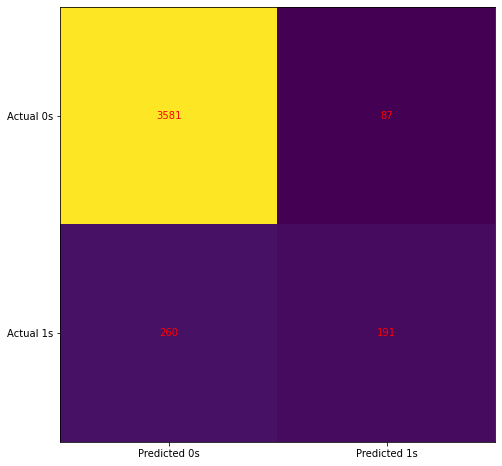

In [343]:
cm = confusion_matrix(y, lr.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [344]:
print(classification_report(y, lr.predict(x)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.69      0.42      0.52       451

    accuracy                           0.92      4119
   macro avg       0.81      0.70      0.74      4119
weighted avg       0.91      0.92      0.91      4119



In [345]:
# improve the model
# input parameter C=10
lr_new = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
lr_new.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [346]:
print(lr_new.intercept_, lr_new.coef_)

[0.00324902] [[ 0.00385695  0.03007516 -0.07656228  0.00987093 -0.03055283 -0.02600292
  -0.02977178 -0.10242194 -0.0280919  -0.04015498  0.00501634 -0.07740099
  -0.00158835 -0.00250047  0.14479641 -0.20830758  0.35797195  0.06142879
  -0.27059819 -0.00637788]]


In [347]:
print(lr_new.predict_proba(x))

[[0.78284219 0.21715781]
 [0.95571376 0.04428624]
 [0.98257117 0.01742883]
 ...
 [0.96707977 0.03292023]
 [0.93275944 0.06724056]
 [0.98251367 0.01748633]]


In [348]:
print(lr_new.predict(x))

[0 0 0 ... 0 0 0]


In [349]:
lr_new.score(x,y)

0.915270696771061

In [350]:
confusion_matrix(y, lr_new.predict(x))

array([[3580,   88],
       [ 261,  190]], dtype=int64)

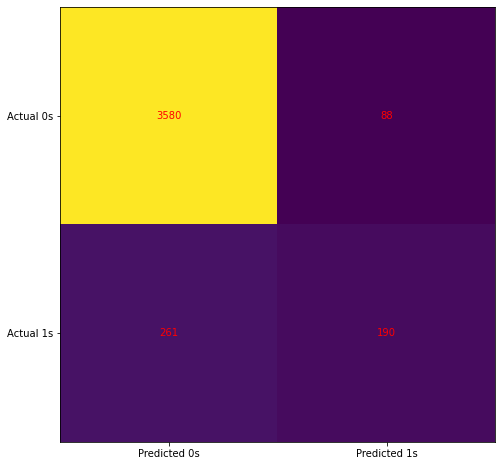

In [351]:
cm = confusion_matrix(y, lr_new.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [352]:
print(classification_report(y, lr_new.predict(x)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.68      0.42      0.52       451

    accuracy                           0.92      4119
   macro avg       0.81      0.70      0.74      4119
weighted avg       0.90      0.92      0.91      4119



In [353]:
# Apakah model overfitting atau tidak?
print("Score data training: ", lr_new.score(X_train, y_train))
print("Score data testing: ", lr_new.score(X_test, y_test))

Score data training:  0.916406520985085
Score data testing:  0.912621359223301


In [354]:
lr_score = lr_new.score(X_train, y_train)
print(lr_score)

0.916406520985085


Setelah dilakukan improve model dengan menaikkan nilai parameter C menjadi 10, maka hasil akurasi yang diperoleh menurun dari 0.9157562515173586 menjadi 0.9142995872784656.

Untuk mengecek apakah model yang dibangun overfitting atau tidak bisa dilakukan dengan membandingkan nilai score pada data training dengan data testing. Model yang dipilih ialah model dengan nilai parameter C=1. 

Hasil yang diperoleh ialah:
Score data training = 0.916406520985085
Score data testing = 0.912621359223301

Dikarenakan selisih yang didapatkan tidak begitu jauh yaitu sekitar 0.002, maka model yang telah dibangun tidak overfitting.

# b. KNN

In [355]:
# import library
# model KNN dengan k=5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [356]:
# Evaluasi model
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8859223300970874


In [357]:
# confusion matrix
confusion_matrix(y, knn.predict(x))

array([[3536,  132],
       [ 198,  253]], dtype=int64)

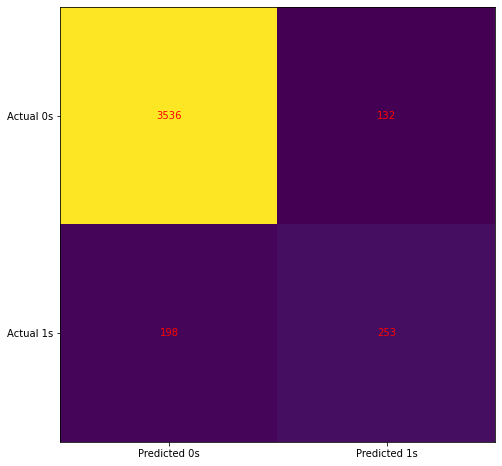

In [358]:
cm = confusion_matrix(y, knn.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [359]:
# KNN with k=7
knn_new = KNeighborsClassifier(n_neighbors=7)

knn_new.fit(X_train, y_train)

y_pred = knn_new.predict(X_test)

In [360]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8915857605177994


In [361]:
# confusion matrix
confusion_matrix(y, knn_new.predict(x))

array([[3534,  134],
       [ 211,  240]], dtype=int64)

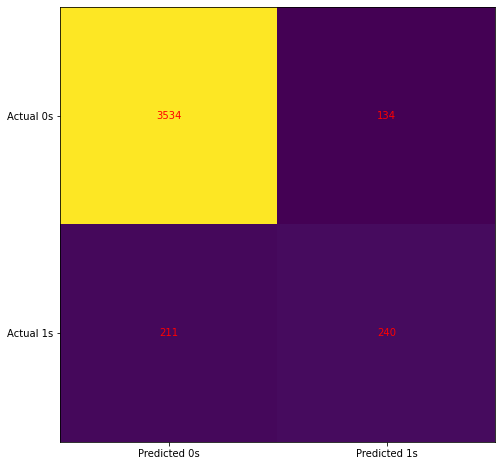

In [362]:
cm = confusion_matrix(y, knn_new.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

Setelah percobaan menggunakan KNN dengan nilai 5 dan 7. Maka sekarang akan dicoba untuk melihat nilai k yang paling baik untuk digunakan. Nilai k yang baik akan menghasilkan error yang minimal. 

In [363]:
error = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

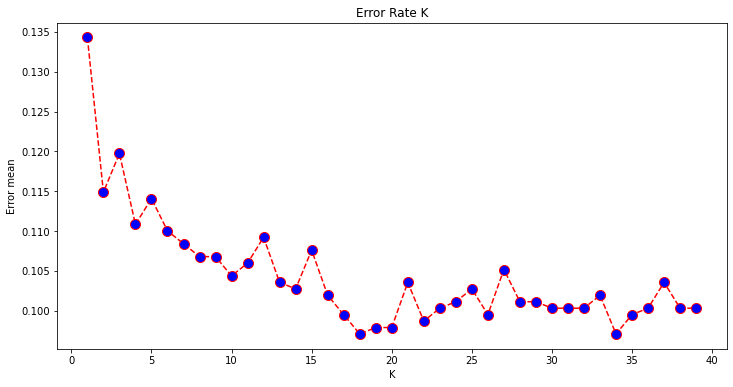

In [364]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color ='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Berdasarkan hasil plot diatas, nilai k terbaik adalah 17 dengan nilai error terkecil yaitu sebesar 0.090. Maka akan dicoba untuk menguji KNN dengan nilai k = 17

In [365]:
knn_17 = KNeighborsClassifier(n_neighbors=17)

knn_17.fit(X_train, y_train)

y_pred = knn_17.predict(X_test)

In [366]:
print('Accuracy score: ', metrics.accuracy_score(y_pred, y_test))

Accuracy score:  0.9004854368932039


In [367]:
knn_score = metrics.accuracy_score(y_pred, y_test)
print(knn_score)

0.9004854368932039


In [368]:
# confusion matrix
confusion_matrix(y, knn_17.predict(x))

array([[3528,  140],
       [ 219,  232]], dtype=int64)

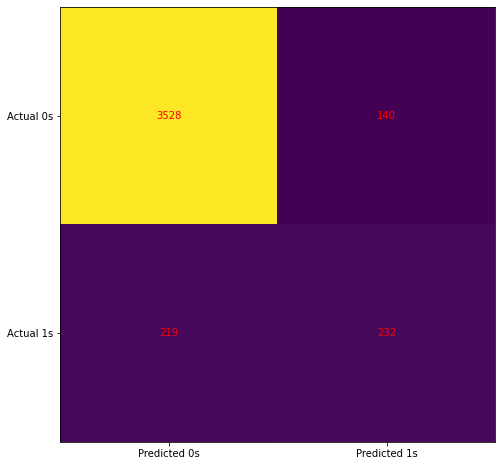

In [369]:
cm = confusion_matrix(y, knn_17.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

Berdasarkan ketiga percobaan KNN dengan nilai yang berbeda, maka KNN memiliki akurasi paling bagus saat k=17 dengan nilai akurasi sebesar 0.9101941747572816. Hal ini jauh lebih baik dibandingkan nilai akurasi sebelumnya. 

In [370]:
# Apakah model overfitting atau tidak?
print("Score data training: ", knn_17.score(X_train, y_train))
print("Score data testing: ", knn_17.score(X_test, y_test))

Score data training:  0.9181408255289629
Score data testing:  0.9004854368932039


Untuk mengecek apakah model yang dibangun overfitting atau tidak bisa dilakukan dengan membandingkan nilai score pada data training dengan data testing. Model yang dipilih ialah model dengan nilai parameter C=1. 

Hasil yang diperoleh ialah:
Score data training = 0.9181408255289629
Score data testing = 0.9004854368932039

Dikarenakan selisih yang didapatkan tidak begitu jauh yaitu sekitar 0.007, maka model yang telah dibangun tidak overfitting.

# c. SVM

In [371]:
# import library untuk SVM
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [372]:
# evaluasi model
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9142394822006472


In [373]:
confusion_matrix(y, clf.predict(x))

array([[3600,   68],
       [ 292,  159]], dtype=int64)

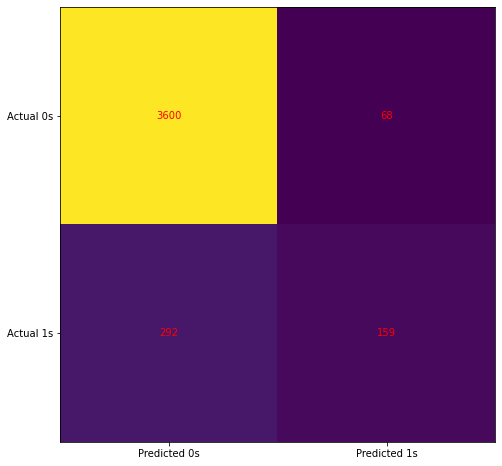

In [374]:
cm = confusion_matrix(y, clf.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [375]:
# Periksa presisi dan recall model
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precision:  0.7230769230769231
Recall:  0.34814814814814815


Nilai presisi dan recall rendah, improve lagi. Akan dicoba dengan menaikkan parameter C menjadi 17. 

In [376]:
# improve the model
# menaikkan parameter C menjadi 17
clf_new = svm.SVC(C=17.0, kernel='linear', random_state=0)

clf_new.fit(X_train, y_train)

y_pred = clf_new.predict(X_test)

In [377]:
# evaluasi model
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9158576051779935


In [378]:
svm_score = metrics.accuracy_score(y_test, y_pred)
print(svm_score)

0.9158576051779935


In [379]:
confusion_matrix(y, clf_new.predict(x))

array([[3614,   54],
       [ 310,  141]], dtype=int64)

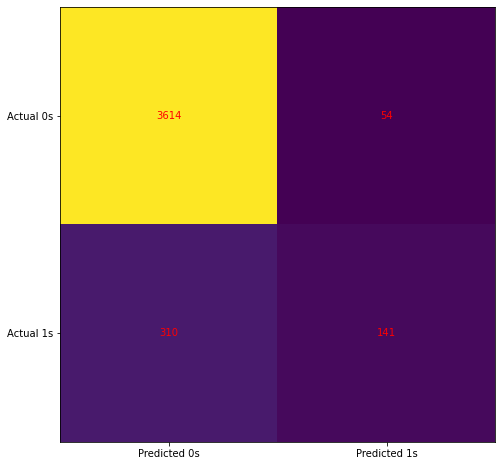

In [380]:
cm = confusion_matrix(y, clf_new.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [381]:
# Periksa presisi dan recall model
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precision:  0.7627118644067796
Recall:  0.3333333333333333


Berdasarkan percobaan diatas, nilai akurasi tertinggi diperoleh pada saat parameter C diubah menjadi 17 yaitu sebesar 0.9142394822006472 diikuti dengan adanya peningkatan pada nilai presisi dan recall.

In [382]:
# Apakah model overfitting atau tidak?
print("Score data training: ", clf_new.score(X_train, y_train))
print("Score data testing: ", clf_new.score(X_test, y_test))

Score data training:  0.909816163718349
Score data testing:  0.9158576051779935


Untuk mengecek apakah model yang dibangun overfitting atau tidak bisa dilakukan dengan membandingkan nilai score pada data training dengan data testing. Model yang dipilih ialah model dengan nilai parameter C=1.

Hasil yang diperoleh ialah: Score data training = 0.909816163718349 Score data testing = 0.9158576051779935

Dikarenakan selisih yang didapatkan tidak begitu jauh yaitu sekitar 0.003, maka model yang telah dibangun tidak overfitting.

# d. Decision Tree

In [383]:
# import library
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [384]:
# evaluasi model
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8867313915857605


In [385]:
dt_score = metrics.accuracy_score(y_test, y_pred)
print(dt_score)

0.8867313915857605


In [386]:
# confusion matrix
confusion_matrix(y, dt.predict(x))

array([[3587,   81],
       [  59,  392]], dtype=int64)

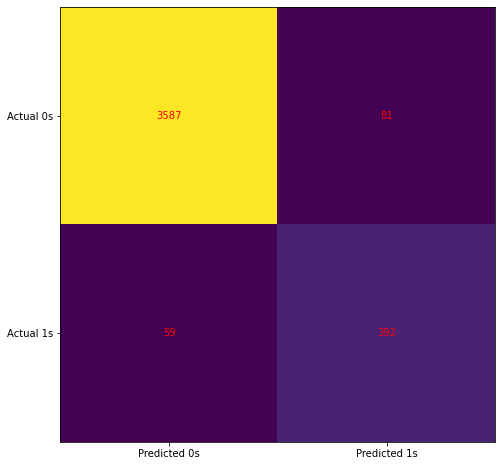

In [387]:
cm = confusion_matrix(y, dt.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [390]:
# Apakah model overfitting atau tidak?
print("Score data training: ", dt.score(X_train, y_train))
print("Score data testing: ", dt.score(X_test, y_test))

Score data training:  1.0
Score data testing:  0.8867313915857605


Untuk mengecek apakah model yang dibangun overfitting atau tidak bisa dilakukan dengan membandingkan nilai score pada data training dengan data testing. 

Hasil yang diperoleh ialah: Score data training = 1.0 Score data testing = 0.8867313915857605

Dapat dilihat bahwa selisih yang didapatkan cukup besar dengan nilai sekitar 0.12, yang menandakan model overfitting.

# e. Random Forest

In [391]:
# import library
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [392]:
# evaluasi model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9053398058252428


In [393]:
rf_score = metrics.accuracy_score(y_test, y_pred)
print(rf_score)

0.9053398058252428


In [394]:
# confusion matrix
confusion_matrix(y, rf.predict(x))

array([[3630,   38],
       [  79,  372]], dtype=int64)

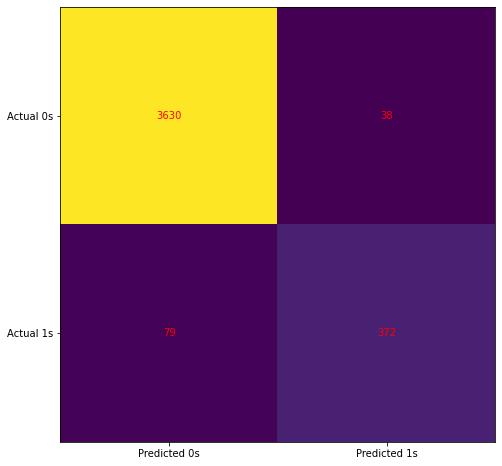

In [395]:
cm = confusion_matrix(y, rf.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [396]:
# Apakah model overfitting atau tidak?
print("Score data training: ", rf.score(X_train, y_train))
print("Score data testing: ", rf.score(X_test, y_test))

Score data training:  1.0
Score data testing:  0.9053398058252428


Untuk mengecek apakah model yang dibangun overfitting atau tidak bisa dilakukan dengan membandingkan nilai score pada data training dengan data testing.

Hasil yang diperoleh ialah: Score data training = 1.0 Score data testing = 0.9053398058252428

Dapat dilihat bahwa selisih yang didapatkan cukup kecil dengan nilai sekitar 0.09, yang menandakan model tidak overfitting.

# f. Naive Bayes

In [397]:
# import library 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

predicted = nb.predict(X_test)

In [398]:
# evaluasi model
print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Accuracy:  0.8422330097087378


In [399]:
nb_score = metrics.accuracy_score(y_test, predicted)
print(nb_score)

0.8422330097087378


In [400]:
# confusion matrix
confusion_matrix(y, clf_new.predict(x))

array([[3614,   54],
       [ 310,  141]], dtype=int64)

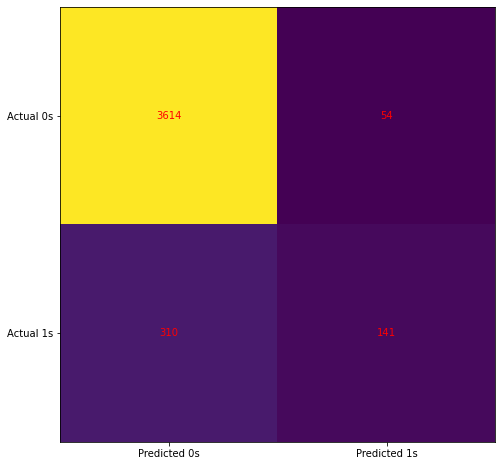

In [401]:
cm = confusion_matrix(y, clf_new.predict(x))

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

In [402]:
# Apakah model overfitting atau tidak?
print("Score data training: ", nb.score(X_train, y_train))
print("Score data testing: ", nb.score(X_test, y_test))

Score data training:  0.8522372528616025
Score data testing:  0.8422330097087378


Untuk mengecek apakah model yang dibangun overfitting atau tidak bisa dilakukan dengan membandingkan nilai score pada data training dengan data testing.

Hasil yang diperoleh ialah: Score data training = 0.8522372528616025 Score data testing = 0.8422330097087378

Dikarenakan selisih yang didapatkan tidak begitu jauh yaitu sekitar 0.01, maka model yang telah dibangun tidak overfitting.

In [403]:
print("Logistic Regression: ", lr_score)
print("KNN: ", knn_score )
print("SVM: ", svm_score)
print("Decision Tree: ", dt_score)
print("Random Forest: ", rf_score)
print("Naive Bayes: ", nb_score)

Logistic Regression:  0.916406520985085
KNN:  0.9004854368932039
SVM:  0.9158576051779935
Decision Tree:  0.8867313915857605
Random Forest:  0.9053398058252428
Naive Bayes:  0.8422330097087378


# 4. Best Algorithm

Berdasarkan percobaan keenam jenis algoritma diatas, algoritma yang paling bagus menurut saya adalah LogisticRegression. Hal ini dikarenakan nilai akurasi yang dihasilkan cukup tinggi dibandingkan yang lain yaitu sebesar 0.916406520985085 dan model yang dibangun tidak tergolong overfitting, selisih yang dihasilkan antara nilai data training dan data testing tidak begitu jauh, yaitu berkisar 0.002. 